In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
alt.renderers.enable('notebook')
import scipy.stats as stat 
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn
import statsmodels.api as sm

In [5]:
data = pd.read_csv('telco.tsv',delimiter="\t")
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
tenure     1000 non-null int64
age        1000 non-null int64
marital    1000 non-null object
address    1000 non-null int64
income     1000 non-null int64
ed         1000 non-null object
employ     1000 non-null int64
retire     1000 non-null object
gender     1000 non-null object
longmon    1000 non-null float64
wiremon    1000 non-null float64
churn      1000 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 74.3+ KB


,tenure,age,marital,address,income,ed,employ,retire,gender,longmon,wiremon,churn
0,13,44,Married,9,64,College degree,5,No,Male,3.70,0.0,Yes
1,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,4.40,35.7,Yes
2,68,52,Married,24,116,Did not complete high school,29,No,Female,18.15,0.0,No
3,33,33,Unmarried,12,33,High school degree,0,No,Female,9.45,0.0,Yes
4,23,30,Married,9,30,Did not complete high school,2,No,Male,6.30,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,Unmarried,0,27,Some college,0,No,Female,3.00,0.0,No
996,7,34,Unmarried,2,22,Post-undergraduate degree,5,No,Female,4.65,0.0,No
997,67,59,Unmarried,40,944,Post-undergraduate degree,33,No,Female,26.75,65.8,No
998,70,49,Unmarried,18,87,High school degree,22,No,Female,25.60,0.0,No


 
1. Have a closer look at the definitions of the variables and analyze which of them might
require a separate treatment. Consider for example the variable ed. There are two
possibilities how the variable ed can be included into the model (one with dummy
variables, the other one without dummies). Think about these two approaches and
suggest which approach is more appropriate. Motivate your decision.


Some comments

Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. 
<br><br>
There are many types of data treatment. Dummy variables allows us to introduce K-1 columns with 0 or 1 value, where K is the number of categories. Another chance is to just code categories with numbers. Second approcah will "fool the regression", as the last category will have more value\weight than the first. This brings the conclusion, that we need to introduce 4 columns of dummy variable (shown in cell below), because we have 5 types of categories. This is done to avoid Dummy-trap, or multicolinearity. It's obvious if the first 4 columns have zero the left one is 1.<br>
Also, our dataset has colums that should be also converted to dummies, those columns are **marital, retire, gender, churn.**<br>
!!!difference between school-college will be same, but if we make it categorical college and scooll will be more distinct

In [6]:
# function that generates K dummies.
def convert_to_dummies(data):
    just_dummies = pd.get_dummies(data,
                                  columns=['marital', 'retire', 'gender', 'churn', 'ed'],
                                  drop_first=True)
    return just_dummies


data = convert_to_dummies(data)
data.head()

,tenure,age,address,income,employ,longmon,wiremon,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college
0,13,44,9,64,5,3.70,0.0,0,0,1,1,0,0,0,0
1,11,33,7,136,5,4.40,35.7,0,0,1,1,0,0,1,0
2,68,52,24,116,29,18.15,0.0,0,0,0,0,1,0,0,0
3,33,33,12,33,0,9.45,0.0,1,0,0,1,0,1,0,0
4,23,30,9,30,2,6.30,0.0,0,0,1,0,1,0,0,0


**2** Consider now the dependent variable and the interval (metric) scaled explanatory
variables. Plot these data and decide if you wish to transform these x-variables and if
there is a need to transform the y variable. You can also use some measure of skewness
to decide about y. The variable wiremon shows a very specific pattern. How would
you take it into account?

2.961653118665478

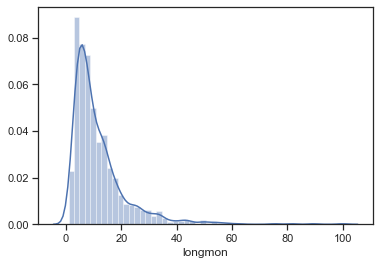

In [7]:
#todo make log longmon
ax = sns.distplot(data.longmon)
skew(data.longmon)

0.16619428694170782

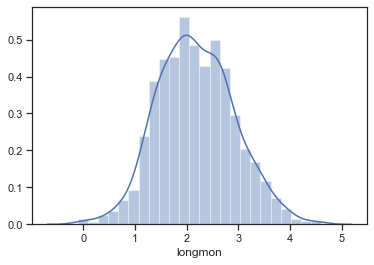

In [8]:
#add log
ax = sns.distplot(np.log(data.longmon))
skew(np.log(data.longmon))

In [9]:
data.longmon = np.log(data.longmon)
data

,tenure,age,address,income,employ,longmon,wiremon,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college
0,13,44,9,64,5,1.308333,0.0,0,0,1,1,0,0,0,0
1,11,33,7,136,5,1.481605,35.7,0,0,1,1,0,0,1,0
2,68,52,24,116,29,2.898671,0.0,0,0,0,0,1,0,0,0
3,33,33,12,33,0,2.246015,0.0,1,0,0,1,0,1,0,0
4,23,30,9,30,2,1.840550,0.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,39,0,27,0,1.098612,0.0,1,0,0,0,0,0,0,1
996,7,34,2,22,5,1.536867,0.0,1,0,0,0,0,0,1,0
997,67,59,40,944,33,3.286534,65.8,1,0,0,0,0,0,1,0
998,70,49,18,87,22,3.242592,0.0,1,0,0,0,0,1,0,0


skewness value > 0, data is right-skewed

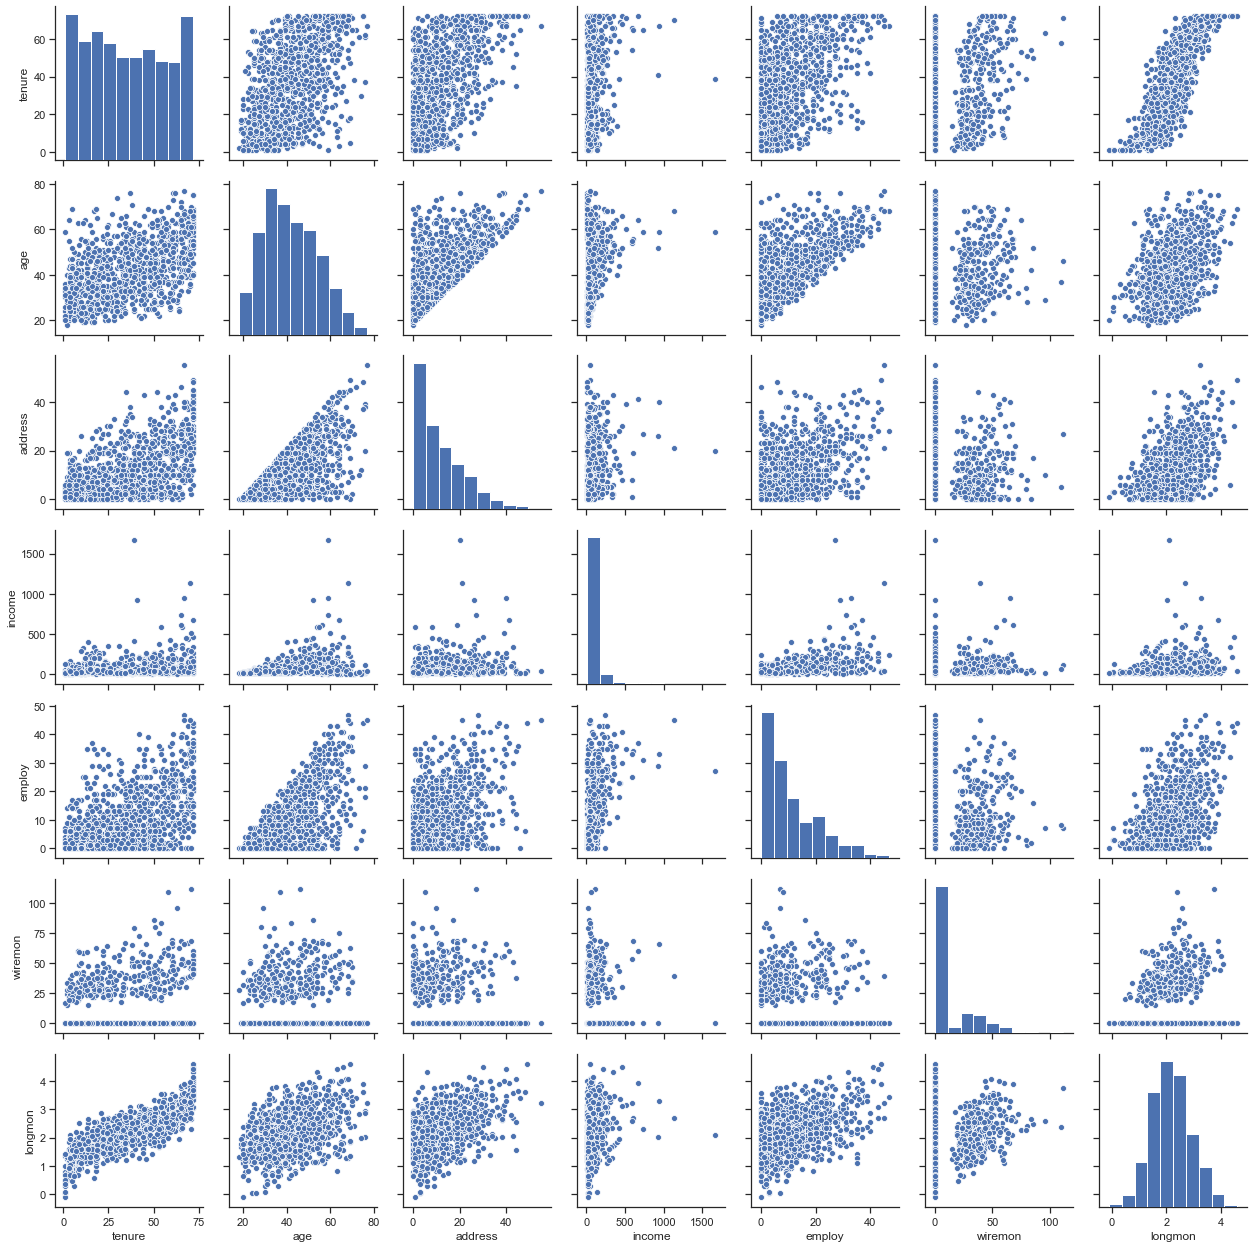

In [10]:
g = sns.pairplot(data,
                 vars=[
                     'tenure', 'age', 'address', 'income', 'employ', 'wiremon',
                     'longmon'
                 ])

**3.** After making up your decision about the above two problems run a simple linear
regression. Pick up one of the regressors. Write down the corresponding hypothesis of
the t-test. Provide the formula for the test statistics, explain the components of the
formula and give the values for this components. Evaluate the goodness of the model.
Explain in your own words the dierence between R2 and adjusted R2.

In [11]:
#normalize
min_max_scaler = MinMaxScaler()
data_normed = pd.DataFrame(min_max_scaler.fit_transform(data))
data_normed.columns = data.columns
data_normed

,tenure,age,address,income,employ,longmon,wiremon,marital_Unmarried,retire_Yes,gender_Male,churn_Yes,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college
0,0.169014,0.440678,0.163636,0.033153,0.106383,0.300145,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.140845,0.254237,0.127273,0.076552,0.106383,0.336933,0.318892,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.943662,0.576271,0.436364,0.064497,0.617021,0.637794,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.450704,0.254237,0.218182,0.014467,0.000000,0.499227,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.309859,0.203390,0.163636,0.012658,0.042553,0.413142,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.126761,0.355932,0.000000,0.010850,0.000000,0.255619,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,0.084507,0.271186,0.036364,0.007836,0.106383,0.348666,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
997,0.929577,0.694915,0.727273,0.563593,0.702128,0.720143,0.587762,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,0.971831,0.525424,0.327273,0.047016,0.468085,0.710813,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
X = data_normed.drop(['longmon'], axis=1)
y = data_normed.longmon
reg = LinearRegression().fit(X, y)
reg.score(X, y)
coefficients = reg.coef_
coefficients


array([ 4.10969201e-01, -3.16955705e-02,  4.42199396e-02, -2.99752440e-02,
        3.56630517e-02,  3.67997724e-04, -1.47809814e-02,  4.21113901e-02,
        7.37312975e-03, -8.22525371e-03, -2.82181735e-02, -7.22553317e-03,
       -2.15380422e-02, -8.67572253e-03, -9.35397488e-04])

In [83]:
X = data_normed.income
reg_statsmodel = sm.OLS(data_normed.longmon, X).fit()
reg_statsmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                longmon   R-squared (uncentered):                   0.320
Model:                            OLS   Adj. R-squared (uncentered):              0.319
Method:                 Least Squares   F-statistic:                              469.6
Date:                Thu, 19 Dec 2019   Prob (F-statistic):                    1.16e-85
Time:                        23:30:21   Log-Likelihood:                         -553.06
No. Observations:                1000   AIC:                                      1108.
Df Residuals:                     999   BIC:                                      1113.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
income         3.7659      0.174     21.670      0.000       3.425       4.107
==============================================================================
Omnibus:                     1043.509   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           103001.595
Skew:                          -4.732   Prob(JB):                         0.00
Kurtosis:                      51.810   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# add a column of ones for the constant intercept term
X = np.vstack(( X, np.ones( X.size ) ))
C = np.linalg.inv( X.dot(X.T) )
 
# multiply by the MSE of the residual
C *= reg_statsmodel.mse_resid
 
# take the square root
SE = np.sqrt(C)
 
print(SE)
j = 4
i = 0
beta = reg_statsmodel.params[j]
se = SE[i,i]
t = beta / se
print ('t =', t)

[[0.20638221        nan]
 [       nan 0.01580636]]


c:\users\stell\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


IndexError: index out of bounds

In [13]:
X.columns

Index(['tenure', 'age', 'address', 'income', 'employ', 'wiremon',
       'marital_Unmarried', 'retire_Yes', 'gender_Male', 'churn_Yes',
       'ed_Did not complete high school', 'ed_High school degree',
       'ed_Post-undergraduate degree', 'ed_Some college'],
      dtype='object')

pick one of regressors - **address**

In [15]:
predict = reg.predict(X)
#y true - y predicted
sigma_squared = (y - reg.predict(X))**2
np.mean(sigma_squared)

0.006871260380093293

In [14]:
XXinv = np.linalg.inv(np.transpose(X).dot(X))

In [16]:
beta = np.diagonal(np.mean(sigma_squared)*(XXinv))

In [17]:
#for one column find test
(beta[3])/np.sqrt(beta[3])
#todo: find p

0.051760277372797384

In [55]:
(beta[4] - 0)/np.sqrt(beta[4])

0.019646620501998644

find goodness of the model 

In [18]:
# the total sum of squares.
SST = (y - np.mean(y))**2

In [19]:
sum(sigma_squared)/sum(SST)

0.28279614359659094

In [20]:
1 - sum(sigma_squared)/sum(SST)

0.7172038564034091

In [21]:
reg.score(X, y)

0.7172038564034091

they are similar

adjusted takes degreees of freedom into accoun

**4.** Compute manually the predicted values from the above regression and the residuals.
Make two plots: residuals vs. true y's and predicted y's vs. true y's. What do you
expect in both cases and why? Do the obtained figures support your expectations?

expected - for all levels  variance of residuals doesnt change

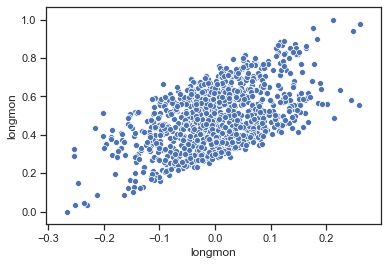

In [22]:
sns.scatterplot((y - predict), y)

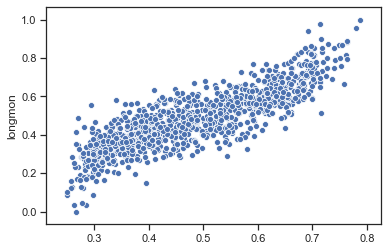

In [23]:
sns.scatterplot(predict, y)

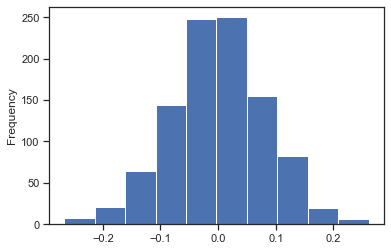

In [24]:
np.mean(y - predict)
(y - predict).plot.hist()

it is almost zero, so they are normally distributed and the mean is close to 0

In [25]:
#sigma squared variable is residuals^2
np.mean(sigma_squared)
(y - predict)

0     -0.062050
1      0.005422
2     -0.040558
3      0.045486
4      0.007135
         ...   
995   -0.058955
996    0.056148
997    0.059557
998    0.022678
999    0.007352
Name: longmon, Length: 1000, dtype: float64

**5**

In [26]:
reg_statsmodel = sm.OLS(y, X).fit()
R = np.zeros((4, len(data_normed.columns) -1))

R[0, 8], R[1, 9], R[2, 10], R[3, 11] = 1,1,1,1
reg_statsmodel.summary()
reg_statsmodel.f_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[75.43092373]]), p=8.037324313349726e-56, df_denom=986, df_num=4>

In [27]:
reg_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                longmon   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              1331.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):                        0.00
Time:                        20:37:38   Log-Likelihood:                          749.66
No. Observations:                1000   AIC:                                     -1471.
Df Residuals:                     986   BIC:                                     -1403.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
tenure                              0.5471      0.015     36.336      0.000       0.518       0.577
age                                 0.2041      0.027      7.698      0.000       0.152       0.256
address                            -0.0240      0.028     -0.865      0.387      -0.079       0.030
income                              0.0295      0.072      0.410      0.682      -0.112       0.171
employ                             -0.0646      0.027     -2.366      0.018      -0.118      -0.011
wiremon                             0.0801      0.022      3.649      0.000       0.037       0.123
marital_Unmarried                   0.0381      0.007      5.377      0.000       0.024       0.052
retire_Yes                         -0.0288      0.020     -1.453      0.147      -0.068       0.010
gender_Male                         0.0478      0.007      6.729      0.000       0.034       0.062
churn_Yes                           0.0718      0.008      8.708      0.000       0.056       0.088
ed_Did not complete high school     0.0776      0.011      6.960      0.000       0.056       0.099
ed_High school degree               0.0974      0.009     10.307      0.000       0.079       0.116
ed_Post-undergraduate degree        0.0534      0.016      3.393      0.001       0.023       0.084
ed_Some college                     0.0936      0.010      9.275      0.000       0.074       0.113
==============================================================================
Omnibus:                        0.930   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.807
Skew:                           0.001   Prob(JB):                        0.668
Kurtosis:                       3.139   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this test P-value shows that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
p is small m almost zero, so we reject H0, so dummy vars have impact

**just for experiment** set wiremon to binary

In [43]:
def set_to_binary(dfb):
    return df.assign(wiremon_binary=(0 if df['wiremon'] == 0 else 1))

In [45]:
data_normed['wiremon_binary'] = data_normed['wiremon'].apply(lambda x: 1 if x != 0 else 0)

In [48]:
data_v2 = data_normed.drop('wiremon', axis=1)

In [53]:
X_2 = data_v2.drop(['longmon'], axis=1)
y = data_v2.longmon
reg_statsmodel = sm.OLS(y, X_2).fit()
R = np.zeros((4, len(data_v2.columns) -1))

R[0, 8], R[1, 9], R[2, 10], R[3, 11] = 1,1,1,1
# reg_statsmodel.summary()
reg_statsmodel.f_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[53.03001059]]), p=1.684730857078597e-40, df_denom=986, df_num=4>

In [54]:
reg_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                longmon   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              1346.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):                        0.00
Time:                        21:04:33   Log-Likelihood:                          755.00
No. Observations:                1000   AIC:                                     -1482.
Df Residuals:                     986   BIC:                                     -1413.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
tenure                              0.5481      0.015     37.013      0.000       0.519       0.577
age                                 0.1980      0.026      7.487      0.000       0.146       0.250
address                            -0.0214      0.028     -0.776      0.438      -0.076       0.033
income                              0.0300      0.071      0.419      0.675      -0.110       0.170
employ                             -0.0645      0.027     -2.377      0.018      -0.118      -0.011
marital_Unmarried                   0.0371      0.007      5.265      0.000       0.023       0.051
retire_Yes                         -0.0267      0.020     -1.356      0.175      -0.065       0.012
gender_Male                         0.0465      0.007      6.575      0.000       0.033       0.060
churn_Yes                           0.0690      0.008      8.381      0.000       0.053       0.085
ed_Did not complete high school     0.0791      0.011      7.173      0.000       0.057       0.101
ed_High school degree               0.0974      0.009     10.389      0.000       0.079       0.116
ed_Post-undergraduate degree        0.0515      0.016      3.290      0.001       0.021       0.082
ed_Some college                     0.0927      0.010      9.241      0.000       0.073       0.112
wiremon_binary                      0.0404      0.008      4.904      0.000       0.024       0.057
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.760
Skew:                          -0.007   Prob(JB):                        0.684
Kurtosis:                       3.134   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**6.**

**address** may mean how long the pace(customer) was served.  <br>
**ed** may influense the frequency of internet usage or long distance call usage <br>
**retire** may show amount of TV usage during the day 

**7**